In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
childcare = pd.read_csv("childcare_costs.csv")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [3]:
counties = pd.read_csv("counties.csv")
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [4]:
counties['county_name'] = counties['county_name'].str.lower()
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,autauga county,Alabama,AL
1,1003,baldwin county,Alabama,AL
2,1005,barbour county,Alabama,AL
3,1007,bibb county,Alabama,AL
4,1009,blount county,Alabama,AL


**Research Question 1**
1. What is the distribution of the relationship between child's stage and costs of childcare in North Carolina in the years 2014-2018?

In [5]:
#sns.displot(data = , x = "")
counties_nc = counties[counties['state_name'] == "North Carolina"]
county_nc_fips_code = counties_nc["county_fips_code"]
nc_childcare = childcare[childcare['county_fips_code'].isin(county_nc_fips_code)]
nc_childcare

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
20789,37001,2008,5.71,5.32,6.07,5.2,4.9,5.5,77.0,73.0,...,20.78,12.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20790,37001,2009,6.60,6.12,7.05,6.1,5.7,6.5,75.8,74.7,...,21.92,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20791,37001,2010,8.35,7.42,9.24,7.9,6.9,8.9,75.7,76.6,...,19.89,11.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20792,37001,2011,8.64,7.55,9.68,8.1,6.9,9.2,75.1,75.0,...,20.43,11.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20793,37001,2012,9.38,8.41,10.33,8.7,7.7,9.6,74.5,76.1,...,20.55,11.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,37199,2014,10.90,10.74,11.08,11.1,11.5,10.8,61.5,64.0,...,26.74,7.32,97.63,67.02,134.06,118.81,126.54,87.30,95.67,87.37
21885,37199,2015,11.01,10.86,11.13,11.6,12.1,11.2,61.7,64.2,...,25.11,7.07,94.99,80.26,140.64,130.18,123.11,103.97,96.75,92.78
21886,37199,2016,9.46,10.13,8.88,9.5,10.9,8.4,60.9,73.8,...,24.43,5.91,92.35,93.50,153.07,141.56,119.69,120.64,97.83,98.18
21887,37199,2017,8.34,9.68,7.18,8.8,10.7,7.1,62.9,89.6,...,23.28,7.69,89.71,106.75,165.50,152.93,116.27,137.32,98.91,103.59


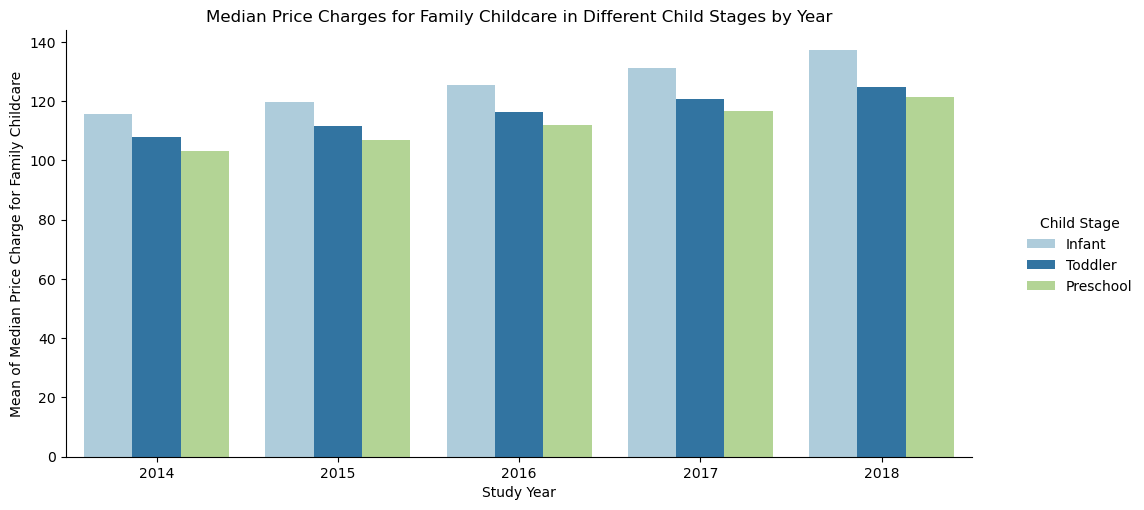

In [6]:
# In NC, aggregated median price charge for Family Childcare in the year 2014-2018
nc_year_grouped = nc_childcare.groupby('study_year')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']].mean()
nc_year_grouped = nc_year_grouped.reset_index()
melted_data = pd.melt(nc_year_grouped, id_vars=['study_year'], value_vars=['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'], var_name='Child Stage', value_name='Mean of Median Price Charge for Family Childcare')
melted_data = melted_data[(melted_data['study_year'] >= 2014) & (melted_data['study_year'] <= 2018)]

g1 = sns.catplot(x='study_year', y = "Mean of Median Price Charge for Family Childcare", hue = "Child Stage", kind='bar', data = melted_data, palette='Paired', aspect=2)


g1.set_axis_labels("Study Year", "Mean of Median Price Charge for Family Childcare")
new_labels = ['Infant', 'Toddler', 'Preschool']
for t, l in zip(g1._legend.texts, new_labels):
    t.set_text(l)
    


# Add a title to the plot
plt.title("Median Price Charges for Family Childcare in Different Child Stages by Year")

# Show the plot
plt.show()

Based on the distribution of the Family childcare spending of North Carolina in the years 2014 to 2018, we are able to make two general observations. 
1. There was a general increase in the spendings for all three child stages in the year 2014 to 2018.
2. Between the Child stages, families spend the most on childcare when the child was an infant (0-23 months), then when the child was a toddler(24-35 months), and lastly they spent the least when the child was in preschool(36-54 months). 

**Research Question**
2. What is the distribution of poverty rate/unemployment rate in North Carolina in the years 2014-2018? 

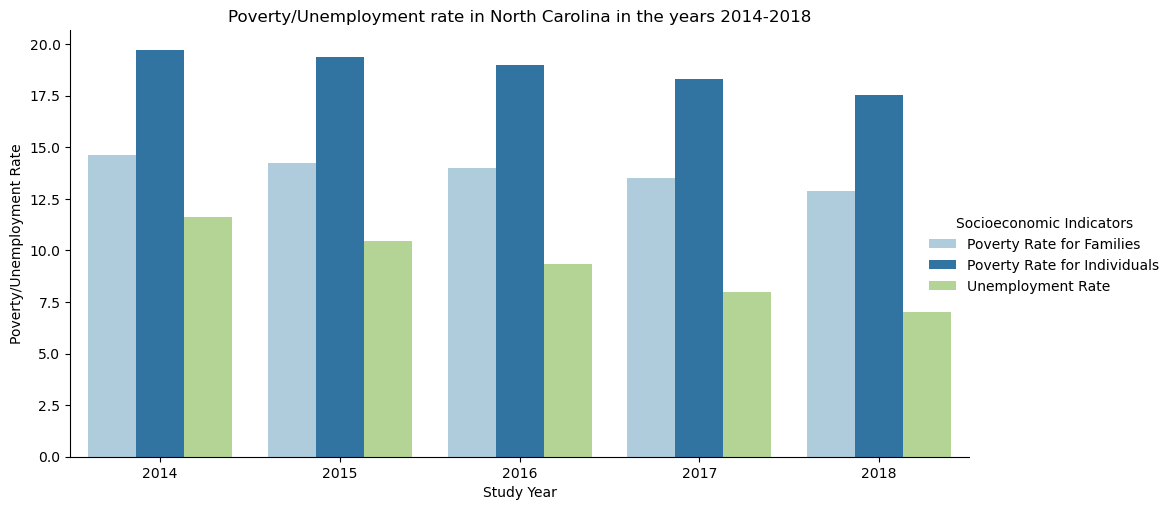

In [7]:
nc_year_grouped_ec = nc_childcare.groupby('study_year')[['pr_f', 'pr_p', 'unr_16']].mean()
nc_year_grouped_ec = nc_year_grouped_ec.reset_index()
melted_data_ec = pd.melt(nc_year_grouped_ec, id_vars=['study_year'], value_vars=['pr_f', 'pr_p', 'unr_16'], var_name='Socioeconomic Indicators', value_name='Poverty/Unemployment Rate')
melted_data_ec
melted_data_ec = melted_data_ec[(melted_data_ec['study_year'] >= 2014) & (melted_data_ec['study_year'] <= 2018)]

g2 = sns.catplot(x='study_year', y = "Poverty/Unemployment Rate", hue = "Socioeconomic Indicators", kind='bar', data = melted_data_ec, palette='Paired', aspect=2)


g2.set_axis_labels("Study Year", "Poverty/Unemployment Rate")
new_labels = ['Poverty Rate for Families', 'Poverty Rate for Individuals', 'Unemployment Rate']
for t, l in zip(g2._legend.texts, new_labels):
    t.set_text(l)
    


# Add a title to the plot
plt.title("Poverty/Unemployment rate in North Carolina in the years 2014-2018")

# Show the plot
plt.show()

Based on the distribution of the Poverty/Unemployment Rate of North Carolina in the years 2014 to 2018, we are able to make two general observations.

1. There was a general decrease in the Poverty and the Unemployment rates in the year 2014 to 2018.
2. Between the different socioeconomic indicators, poverty rate for individuals was the highest, followed by the poverty rate for families. Lastly, the unemployment rate was the lowest. 

**Research Question 3**
What is the relationship between child care cost and average income in the year 2018 in North Carolina?

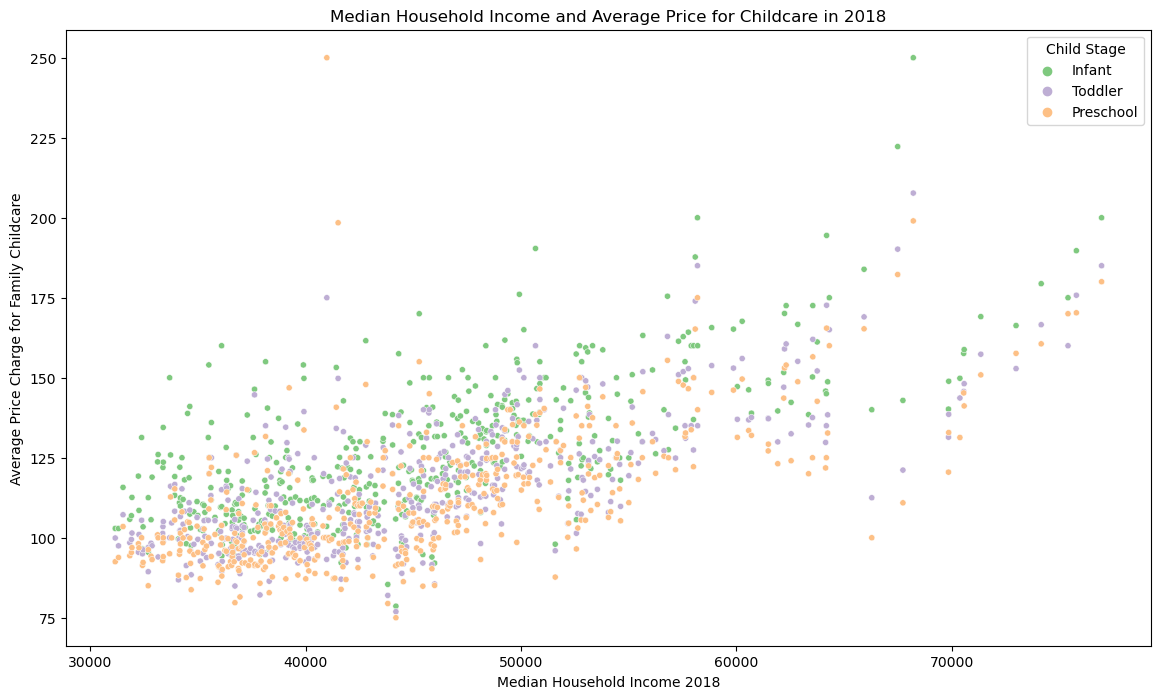

In [8]:
nc_year_grouped = nc_childcare.groupby('mhi_2018')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']].mean()
nc_year_grouped = nc_year_grouped.reset_index()
melted_data = pd.melt(nc_year_grouped, id_vars=['mhi_2018'], value_vars=['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'], var_name='Child Stage', value_name='Mean of Median Price Charge for Family Childcare')
plt.figure(figsize=(14, 8))
g3 = sns.scatterplot(x='mhi_2018', y="Mean of Median Price Charge for Family Childcare", hue="Child Stage",palette='Accent',data=melted_data,s=20)
plt.title('Median Household Income and Average Price for Childcare in 2018')
plt.xlabel('Median Household Income 2018')
plt.ylabel('Average Price Charge for Family Childcare')

new_labels = ['Infant', 'Toddler', 'Preschool']
g3.get_legend().set_title("Child Stage")
for t, l in zip(g3.get_legend().texts, new_labels):
    t.set_text(l)
    
plt.show()    

Based on the scatterplot of the relationship between child care cost and average income in the year 2018 in North Carolina, we are able to make two general observations.

1. There is a positive relationship between the median household income and average price charge for family childcare cost in 2018.
2. Between the different child stages, families spend the most on childcare when the child was an infant (0-23 months), then when the child was a toddler(24-35 months), and lastly they spent the least when the child was in preschool(36-54 months).